In [1]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
from threading import Thread
import sys
from queue import Queue
from imutils.video import FileVideoStream
from imutils.video import FPS
import argparse
import imutils
import time

In [3]:
class FileVideoStream:
    def __init__(self, path, queueSize=128):
		# initialize the file video stream along with the boolean
		# used to indicate if the thread should be stopped or not
        self.stream = cv.VideoCapture(path)
        self.stopped = False
		# initialize the queue used to store frames read from
		# the video file
        self.Q = Queue(maxsize=queueSize)
    def start(self):
		# start a thread to read frames from the file video stream
        t = Thread(target=self.update, args=())
        t.daemon = True
        t.start()
        return self
    def update(self):
		# keep looping infinitely
        while True:
			# if the thread indicator variable is set, stop the
			# thread
            if self.stopped:
                return
			# otherwise, ensure the queue has room in it
            if not self.Q.full():
				# read the next frame from the file
                (grabbed, frame) = self.stream.read()
				# if the `grabbed` boolean is `False`, then we have
				# reached the end of the video file
                if not grabbed:
                    self.stop()
                    return
                # add the frame to the queue
                self.Q.put(frame)
										
    def read(self):
    	# return next frame in the queue
        return self.Q.get()
    def more(self):
		# return True if there are still frames in the queue
        return self.Q.qsize() > 0
    def stop(self):
		# indicate that the thread should be stopped
        self.stopped = True

In [4]:
# construct the argument parse and parse the arguments
path=os.getcwd()
path+="\\videos"
# start the file video stream thread and allow the buffer to
# start to fill
print("[INFO] starting video file thread...")
fvs = FileVideoStream(path+"\\output3.mp4").start()
time.sleep(1.0)
# start the FPS timer
fps = FPS().start()

[INFO] starting video file thread...


C:\Users\daniel paulí\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


KeyboardInterrupt: 

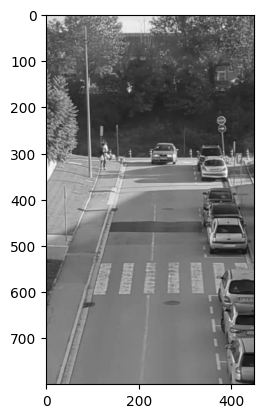

In [5]:
while fvs.more():
	# grab the frame from the threaded video file stream, resize
	# it, and convert it to grayscale (while still retaining 3
	# channels)
	frame = fvs.read()
	frame = imutils.resize(frame, width=450)
	frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
	frame = np.dstack([frame, frame, frame])
	# display the size of the queue on the frame
	#cv.putText(frame, "Queue Size: {}".format(fvs.Q.qsize()),(10, 30), cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)	
	# show the frame and update the FPS counter
	plt.imshow(frame)
	plt.waitforbuttonpress(0.00001)	
	fps.update()